In [1]:
# IMPORTS

import random
import csv
import scipy
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from tqdm.notebook import tqdm

from time import time
import os.path

from socket import gethostname
from scipy.optimize import curve_fit

%config InlineBackend.figure_formats = ['svg']

In [2]:
def si_plot(fi_i, fi_f, fs_f, t_off, file_path="", cum=False):
    fun = scipy.interpolate.interp1d(fi_f, fi_i, kind='cubic', bounds_error=False, fill_value="extrapolate")
    i_interp = fun(fs_f)

    if cum:
        axs.plot(syns, i_interp)
            
    else:
        fig_i, axs_i = plt.subplots(figsize=(5,5))
        axs_i.plot(syns, i_interp)
        axs_i.set_xlabel('Input (# of Synapses)', fontsize=14)
        axs_i.set_ylabel('Estimated Current Reaching Soma (nA)', fontsize=14)
        title_string = 'Dendritic I/O Curve ($∂_{Excit}$: ' + str(t_off) + ' ms)'
        axs_i.set_title(title_string, fontsize=14)
        axs_i.grid(visible=True, which='major')

        if file_path != "":
            plot_i_filename = file_path + "/is-curve-plots/inhibition-" + str(t_off) + ".svg"
            data_i_filename = file_path + "/is-curve-data/inhibition-" + str(t_off) + ".csv"
            fig_i.savefig(plot_i_filename, bbox_inches = 'tight')

            np.savetxt(data_i_filename, np.vstack((syns, i_interp)).T, delimiter=",")
            

In [5]:
# INDVIDUAL PLOT

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

for t_o in range(1, 16):
    print(t_o)
    f_file_path = "fs-curve-collection/fs-collection-compiled/variable-inhibition-fs-" + str(t_o) + ".csv"
    f = np.loadtxt(f_file_path, delimiter=",")
    syns = np.array(range(0, len(f)))

    f_current_file_path = "fi-curve-collection/fi-collection-compiled/variable-inhibition-fi-" + str(t_o) + ".csv"
    f_current = np.loadtxt(f_current_file_path, delimiter=",")
    inj_i = f_current[:, 0]
    f_i = f_current[:, 1]
    i_interp = si_plot(inj_i, f_i, f, t_off=t_o, file_path="is-curve-collection", cum=False)


1


ValueError: Expect x to not have duplicates

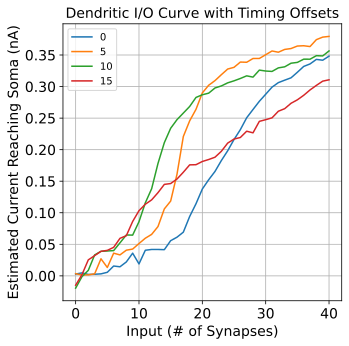

In [4]:
# CUMULATIVE PLOT

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
fig, axs = plt.subplots(figsize=(5,5))

for t_o in range(0, 20, 5):
    f_file_path = "fs-curve-collection/fs-collection-timing-compiled-shorter-tau/timing-offset-fs-" + str(t_o) + ".csv"
    f = np.loadtxt(f_file_path, delimiter=",")
    syns = np.array(range(0, len(f)))

    f_current_file_path = "fi-curve-collection/fi-timing-higher-conductance-lower-tau.csv"
    f_current = np.loadtxt(f_current_file_path, delimiter=",")
    inj_i = f_current[:, 0]
    f_i = f_current[:, 1]
    i_interp = si_plot(inj_i, f_i, f, t_off=t_o, file_path="", cum=True)

axs.set_xlabel('Input (# of Synapses)', fontsize=14)
axs.set_ylabel('Estimated Current Reaching Soma (nA)', fontsize=14)
title_string = 'Dendritic I/O Curve with Timing Offsets'
axs.set_title(title_string, fontsize=14)
axs.grid(visible=True, which='major')
axs.legend(["0", "5", "10", "15"])
cum_file_path = "is-curve-collection/0-015-conductance-shorter-tau/is-curve-plots/timing-offset-plot-cumulative.svg"
fig.savefig(cum_file_path, bbox_inches = 'tight')
